 Νικόλας Πηγαδάς  


#  Project Ανάλυσης Δεδομένων από Αισθητήρα Γλυκόζης


### Σκοπός
Σκοπός του project είναι η εφαρμογή κριτηρίων αξιολόγησης της διακριτικής ικανότητας αισθητήρων καταγραφής φυσιολογικών παραμέτρων.

### Περιγραφή 
Χρησιμοποιούνται δεδομένα χρονοσειρών γλυκόζης ατόμων με σακχαρώδη διαβήτη τύπου 1, τα οποία προέκυψαν από την εφαρμογή υπολογιστικών πειραμάτων ανοικτού βρόχου στον προσομοιωτή UVa T1DM. Ο προσομοιωτής UVa T1DM είναι ένα υπολογιστικό περιβάλλον που διαθέτει εικονικούς ασθενείς (παιδιά, έφηβους, ενήλικες) με σακχαρώδη διαβήτη τύπου 1 και έχει λάβει έγκριση από τον Αμερικανικό Οργανισμό Φαρμάκων (FDA) για να χρησιμοποιείται ως υποκατάσταστο προκλινικών δοκιμών για την αξιολόγηση ελεγκτών γλυκόζης. Στο project αυτό αξιολογείται η ακρίβεια των αισθητήρων συνεχούς καταγραφής γλυκόζης, εφαρμόζοντας κατάλληλα κριτήρια αξιολόγησης.








### Δεδομένα
Τα δεδομένα που δίνονται αντιστοιχούν σε περίπου 3.5 ημέρες και αποτελούνται από τρεις στήλες: (i) στη στήλη Α παρουσιάζεται ο χρόνος σε λεπτά, (ii) στη στήλη Β, οι τιμές γλυκόζης αίματος σε mg/dl, και (iii) στη στήλη C, οι καταγραφές γλυκόζης από αισθητήρα συνεχούς καταγραφής γλυκόζης σε mg/dl. Συνήθως οι αισθητήρες συνεχούς καταγραφής γλυκόζης παρουσιάζουν ανακρίβειες και αποκλίσεις από την γλυκόζη αναφοράς (γλυκόζη αίματος).  

## Βιβλιοθήκες

In [ ]:
import pandas as pd
import numpy as np
import math 
from sklearn import metrics
import matplotlib.pyplot as plt

## Ανάκτηση δεδομένων
Κατ' αρχάς, τα δεδομένα ανακτήθηκαν από το αρχείο 'data.xlsm'.  
Κατόπιν, κάνω mount το google colab για να χρησιμοποιηθεί σαν file system και να μπορέσω να διαβάσω τα δεδομένα:

In [ ]:
from google.colab import drive
path = "/gdrive/My Drive/biosensor_file/"
drive.mount('/gdrive')

Mounted at /gdrive


Ανάγνωση του αρχείου και έλεγχός του:

In [ ]:
glucose = pd.read_csv(path + "data.csv", sep = ';', decimal=',') 
glucose.head()

,Time (min),Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl)
0,1,145.08,150.489709
1,2,145.08,150.079117
2,3,145.08,149.668526
3,4,145.08,149.257935
4,5,145.08,148.847344


In [ ]:
glucose['Blood Glucose (mg/dl)'].describe()

count    5041.000000
mean      121.855294
std        36.867692
min        55.442652
25%        94.027319
50%       126.816166
75%       145.079948
max       190.619747
Name: Blood Glucose (mg/dl), dtype: float64

In [ ]:
glucose['Sensor Glucose Readings(mg/dl)'].describe()

count    5041.000000
mean      123.863692
std        38.752359
min        32.000000
25%        94.395244
50%       131.850756
75%       150.959510
max       201.796907
Name: Sensor Glucose Readings(mg/dl), dtype: float64

## Οπτική Ι 
_______________________________________________________________________
Εφαρμογή μέσης απόλυτης σχετικής διαφοράς και συντελεστή συσχέτισης:
* MARD
* CC  

για την αξιολόγηση κατά πόσο οι καταγραφές γλυκόζης από τον αισθητήρα προσεγγίζουν τις τιμές γλυκόζης αίματος στην περιοχή:
* της υπογλυκαιμίας (<70 mg/dl)
* της ευγλυκαιμίας 
* της υπεργλυκαιμίας (>180 mg/dl).


### Σύστημα γενικά

**MARD**(mean absolute relative difference/μέσης απόλυτης σχετικής διαφοράς):


In [ ]:
ARD = np.empty(5041, dtype=object)
sum_ARD = 0
y_cgm_mean = 0
y_ref_mean = 0

for i in range(5041):
   y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
   y_cgm_mean = y_cgm_mean + y_cgm_tk

   y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]
   y_ref_mean = y_ref_mean + y_ref_tk 

   ARD[i] = 100 * abs(y_cgm_tk - y_ref_tk) / y_ref_tk
   sum_ARD = sum_ARD + ARD[i]

MARD = sum_ARD / 5041
y_cgm_mean =  y_cgm_mean / 5041
y_ref_mean = y_ref_mean / 5041

print("MARD = ", MARD)
print("y_cgm_mean =", y_cgm_mean)
print("y_ref_mean =", y_ref_mean)

MARD =  6.907752643840446
y_cgm_mean = 123.86369248713554
y_ref_mean = 121.85529448615578


Παρατηρώ ότι η τιμή του MARD είναι <10%, οπότε το cgm(continuous glucose monitoring) σύστημα έχει ικανοποιητική επίδοση, αφού οι πραγματικές τιμές με τις μετρούμενες είναι αρκετά κοντά. Επίσης, οι μέσες τιμές υπολογίστηκαν αναλυτικά και επαληθεύονται από την εντολή describe που βρίσκεται παραπάνω.   
Πηγή: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7189145/#:~:text=Reported%20as%20a%20percentage%2C%20MARD,to%20have%20good%20analytical%20performance

**CC**(correlation coefficient/συντελεστής συσχέτισης)





In [ ]:
r_numerator_sum = 0
r_denominator_sum1 = 0
r_denominator_sum2 = 0

for i in range(5041):
  y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
  y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]

  r_numerator_sum = r_numerator_sum + (y_cgm_tk - y_cgm_mean) * (y_ref_tk - y_ref_mean)

  r_denominator_sum1 = r_denominator_sum1 + (y_cgm_tk - y_cgm_mean) * (y_cgm_tk - y_cgm_mean)
  r_denominator_sum2 = r_denominator_sum2 + (y_ref_tk - y_ref_mean) * (y_ref_tk - y_ref_mean)

r = r_numerator_sum / math.sqrt(r_denominator_sum1 * r_denominator_sum2)
print(r)

0.9711328705535384


Και εδώ η τιμή είναι η επιθυμητή, καθώς αναμέναμε αποτέλεσμα μεταξύ 0.88-0.97. Τιμή σε αυτό το διάστημα σημαίνει ότι η διαφορά στις μετρήσεις δεν είναι εντελώς τυχαία, αλλά αφορά διάφορα φαινόμενα(transport/uptake effects).   
Πηγή: https://ir.canterbury.ac.nz/bitstream/handle/10092/14540/Accuracy%20%20%20Performance%20of%20CGMs%20in%20Athletes%20-%20REVISED.pdf?sequence=2#:~:text=CGM%20devices%20agree%20very%20well,for%20the%20different%20sensor%20pairings  
(σελίδα 2, προτελευταία πρόταση)

### Ενδιαφέρουσες περιοχές

Το σύστημα μετρήσεών μας φαίνεται αξιόπιστο. Mας ενδιαφέρουν, όμως, και οι τιμές στην περιοχή της υπογλυκαιμίας(<70 mg/dl), της ευγλυκαιμίας(70 mg/dl<...<180 mg/dl) και υπεργλυκαιμίας(>180 mg/dl) ξεχωριστά, καθώς έχουν μεγαλύτερη σημασία να γίνονται με ακριβή τρόπο οι μετρήσεις στα κρίσιμα όρια(<70 mg/dl, >180 mg/dl).

### Περιοχή υπογλυκαιμίας(<70 mg/dl)

**MARD**(mean absolute relative difference/μέσης απόλυτης σχετικής διαφοράς):






In [ ]:
ARD = np.empty(5041, dtype=object)
sum_ARD = 0
y_cgm_mean = 0
y_ref_mean = 0
counter = 0

for i in range(5041):
   y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
   #y_cgm_mean = y_cgm_mean + y_cgm_tk

   y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]
   #y_ref_mean = y_ref_mean + y_ref_tk 

   if y_cgm_tk < 70 or y_ref_tk < 70:
      ARD[i] = 100 * abs(y_cgm_tk - y_ref_tk) / y_ref_tk
      sum_ARD = sum_ARD + ARD[i]
      y_ref_mean = y_ref_mean + y_ref_tk # den theloume oi mesoi oroi twn genikwn metrhsewn na ephreasoun
      y_cgm_mean = y_cgm_mean + y_cgm_tk # ta apotelesmata gia sygkekrimenh perioxh, opote ypologizw ek neou toys mesous orous gia thn ekastote perioxh
      counter = counter + 1

MARD = sum_ARD / counter
y_cgm_mean =  y_cgm_mean / counter
y_ref_mean = y_ref_mean / counter

print("MARD = ", MARD)
print("y_cgm_mean =", y_cgm_mean)
print("y_ref_mean =", y_ref_mean)

MARD =  12.273836052889633
y_cgm_mean = 61.97809658647861
y_ref_mean = 61.95972146937926


**CC**(correlation coefficient/συντελεστής συσχέτισης)


In [ ]:
r_numerator_sum = 0
r_denominator_sum1 = 0
r_denominator_sum2 = 0

for i in range(5041):
  y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
  y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]


  if y_cgm_tk < 70 or y_ref_tk < 70:
     r_numerator_sum = r_numerator_sum + (y_cgm_tk - y_cgm_mean) * (y_ref_tk - y_ref_mean)
     r_denominator_sum1 = r_denominator_sum1 + (y_cgm_tk - y_cgm_mean) * (y_cgm_tk - y_cgm_mean)
     r_denominator_sum2 = r_denominator_sum2 + (y_ref_tk - y_ref_mean) * (y_ref_tk - y_ref_mean)

r = r_numerator_sum / math.sqrt(r_denominator_sum1 * r_denominator_sum2)
print(r)

0.4426118341135295


Τα παραπάνω εξαγόμενα αποτελέσματα για την περιοχή της υπογλυκαιμίας δεν είναι καθόλου ικανοποιητικά. Απαιτείται άμεση δράση για αντικατάσταση/βελτίωση του cgm συστήματος, καθώς ο ασθενής τίθεται σε σοβαρό κίνδυνο. Τουλάχιστον, όμως, υπάρχει μερική γραμμικότητα μεταξύ των μετρήσεων(CC).

Αξίζει να σημειωθεί ότι συμπεριέλαβα την περιοχή <70 mg/dl είτε για το cgm, είτε για το ref, γιατί ενδέχεται να υπάρχει μεγάλη απόκλιση στις τιμές και να βρίσκονται σε διαφορετική περιοχή.

### Περιοχή ευγλυκαιμίας(70 mg/dl<...<180 mg/dl)

**MARD**(mean absolute relative difference/μέσης απόλυτης σχετικής διαφοράς):


In [ ]:
ARD = np.empty(5041, dtype=object)
sum_ARD = 0
y_cgm_mean = 0
y_ref_mean = 0
counter = 0

for i in range(5041):
   y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
   #y_cgm_mean = y_cgm_mean + y_cgm_tk

   y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]
   #y_ref_mean = y_ref_mean + y_ref_tk 

   if (y_cgm_tk > 70 and y_cgm_tk < 180) or (y_ref_tk > 70 and y_ref_tk < 180):
      ARD[i] = 100 * abs(y_cgm_tk - y_ref_tk) / y_ref_tk
      sum_ARD = sum_ARD + ARD[i]
      y_ref_mean = y_ref_mean + y_ref_tk # den theloume oi mesoi oroi twn genikwn metrhsewn na ephreasoun
      y_cgm_mean = y_cgm_mean + y_cgm_tk # ta apotelesmata gia sygkekrimenh perioxh, opote ypologizw ek neou toys mesous orous gia thn ekastote perioxh
      counter = counter + 1

MARD = sum_ARD / counter
y_cgm_mean =  y_cgm_mean / counter
y_ref_mean = y_ref_mean / counter

print("MARD = ", MARD)
print("y_cgm_mean =", y_cgm_mean)
print("y_ref_mean =", y_ref_mean)

MARD =  6.560279299975212
y_cgm_mean = 132.14997825559018
y_ref_mean = 129.59559617726424


**CC**(correlation coefficient/συντελεστής συσχέτισης)


In [ ]:
r_numerator_sum = 0
r_denominator_sum1 = 0
r_denominator_sum2 = 0

for i in range(5041):
  y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
  y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]


  if (y_cgm_tk > 70 and y_cgm_tk < 180) or (y_ref_tk > 70 and y_ref_tk < 180):
     r_numerator_sum = r_numerator_sum + (y_cgm_tk - y_cgm_mean) * (y_ref_tk - y_ref_mean)
     r_denominator_sum1 = r_denominator_sum1 + (y_cgm_tk - y_cgm_mean) * (y_cgm_tk - y_cgm_mean)
     r_denominator_sum2 = r_denominator_sum2 + (y_ref_tk - y_ref_mean) * (y_ref_tk - y_ref_mean)

r = r_numerator_sum / math.sqrt(r_denominator_sum1 * r_denominator_sum2)
print(r)

0.9491693573796371


Τα παραπάνω εξαγόμενα αποτελέσματα για την περιοχή της ευγλυκαιμίας είναι πιο ακριβή από τις συνολικές μετρήσεις του cgm συστήματος στη μετρική MARD, αλλά όχι στην CC. Αν σε μια περιοχή θα ήμασταν πιο ελαστικοί να μην έχουμε τα πιο ακριβή αποτελέσματα, θα ήταν αυτή. Βέβαια, τα αποτελέσματα εδώ είναι πολύ ικανοποιητικά και τα μόνα πιστά στα πραγματικά. 

Αξίζει να σημειωθεί και εδώ ότι συμπεριέλαβα την περιοχή 70 mg/dl<...<180 mg/dl είτε για το cgm, είτε για το ref, γιατί ενδέχεται να υπάρχει μεγάλη απόκλιση στις τιμές και να βρίσκονται σε διαφορετική περιοχή.

### Περιοχή υπεργλυκαιμίας(>180 mg/dl)

**MARD**(mean absolute relative difference/μέσης απόλυτης σχετικής διαφοράς):


In [ ]:
ARD = np.empty(5041, dtype=object)
sum_ARD = 0
y_cgm_mean = 0
y_ref_mean = 0
counter = 0

for i in range(5041):
   y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
   #y_cgm_mean = y_cgm_mean + y_cgm_tk

   y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]
   #y_ref_mean = y_ref_mean + y_ref_tk 

   if y_cgm_tk > 180 or y_ref_tk > 180:
      ARD[i] = 100 * abs(y_cgm_tk - y_ref_tk) / y_ref_tk
      sum_ARD = sum_ARD + ARD[i]
      y_ref_mean = y_ref_mean + y_ref_tk # den theloume oi mesoi oroi twn genikwn metrhsewn na ephreasoun
      y_cgm_mean = y_cgm_mean + y_cgm_tk # ta apotelesmata gia sygkekrimenh perioxh, opote ypologizw ek neou toys mesous orous gia thn ekastote perioxh
      counter = counter + 1

MARD = sum_ARD / counter
y_cgm_mean =  y_cgm_mean / counter
y_ref_mean = y_ref_mean / counter

print("MARD = ", MARD)
print("y_cgm_mean =", y_cgm_mean)
print("y_ref_mean =", y_ref_mean)

MARD =  5.5494773881272135
y_cgm_mean = 186.3857819728435
y_ref_mean = 179.5469335546327


**CC**(correlation coefficient/συντελεστής συσχέτισης)


In [ ]:
r_numerator_sum = 0
r_denominator_sum1 = 0
r_denominator_sum2 = 0

for i in range(5041):
  y_cgm_tk = glucose['Sensor Glucose Readings(mg/dl)'][i]
  y_ref_tk = glucose['Blood Glucose (mg/dl)'][i]


  if y_cgm_tk > 180 or y_ref_tk > 180:
     r_numerator_sum = r_numerator_sum + (y_cgm_tk - y_cgm_mean) * (y_ref_tk - y_ref_mean)
     r_denominator_sum1 = r_denominator_sum1 + (y_cgm_tk - y_cgm_mean) * (y_cgm_tk - y_cgm_mean)
     r_denominator_sum2 = r_denominator_sum2 + (y_ref_tk - y_ref_mean) * (y_ref_tk - y_ref_mean)

r = r_numerator_sum / math.sqrt(r_denominator_sum1 * r_denominator_sum2)
print(r)

0.05986449228000937


Τα παραπάνω εξαγόμενα αποτελέσματα για την περιοχή της υπεργλυκαιμίας φαίνονται εκ πρώτης όψεως σωστά, κοιτώντας την μετρική MARD. Εκ δεύτερης όψης, όμως, η μετρική CC φανερώνει ότι οι τιμές που βρίσκει ο μετρητής σε σχέση με τις πραγματικές είναι γραμμικά ασυσχέτιστες. Αυτό δεν μπορεί παρά να είναι προβληματικό, καθώς αναμένουμε από τον αισθητήρα να ακολουθεί πιστά τις αυξομειώσεις στις τιμές της γλυκόζης, ώστε να είναι ακριβής. Ακόμα, δηλαδή, και που βρίσκει κοντινές τιμές/την σωστή περιοχή, τις εξάγει είτε σε λάθος χρονική στιγμή ή ακόμα χειρότερα, τυχαία.

Αξίζει να σημειωθεί και εδώ ότι συμπεριέλαβα την περιοχή >180 mg/dl είτε για το cgm, είτε για το ref, γιατί ενδέχεται να υπάρχει μεγάλη απόκλιση στις τιμές και να βρίσκονται σε διαφορετική περιοχή.

## Οπτική ΙΙ
_______________________________________________________________________

Θεωρώντας ως υπογλυκαιμικά επεισόδια τις τιμές γλυκόζης που είναι μικρότερες από 70 mg/dl, γίνεται εφαρμογή της **ROC ανάλυσης** για την αξιολόγηση της ικανότητας του αισθητήρα συνεχούς καταγραφής γλυκόζης να ανιχνεύει τις υπογλυκαιμίες. Εφαρμόζοντας την τιμή 70 mg/dl ως κατώφλι γλυκόζης, οι χρονοσειρές γλυκόζης αντιμετωπίζονται ως δυαδικές και με αυτό τον τρόπο καθίσταται εφικτή η εφαρμογή της ROC ανάλυσης. 

Υπολογισμός δεικτών: 
* Ευαισθησία
* Ειδικότητα
* Θετική Προγνωστική Αξία
* Αρνητική Προγνωστική Αξία
* Ακρίβεια

In [ ]:
glucose.head()

,Time (min),Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl)
0,1,145.08,150.489709
1,2,145.08,150.079117
2,3,145.08,149.668526
3,4,145.08,149.257935
4,5,145.08,148.847344


In [ ]:
y = np.where(glucose['Blood Glucose (mg/dl)'] > 70, 0, 1)
scores = np.where(glucose['Sensor Glucose Readings(mg/dl)'] > 70, 0, 1)
print('y shape =', np.prod(y.shape))
print('scores shape =', np.prod(scores.shape))


#for i in range(5041):
#  print(y[i])
print(y)

y shape = 5041
scores shape = 5041
[0 0 0 ... 0 0 0]


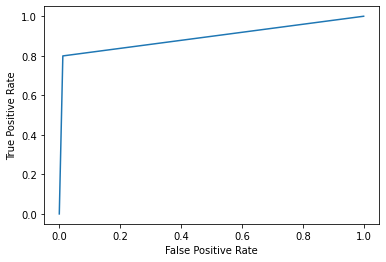

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y, scores)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Η ROC καμπύλη φανερώνει ότι οι μετρήσεις μας κοντά στην περιοχή της υπογλυκαιμίας έχουν την τάση να είναι σωστές, όσον αφορά την ταξινόμηση στην σωστή περιοχή, υπογλυκαιμίας ή ευγλυκαιμίας. Όμως, για ένα cgm σύστημα, τα αποτελέσματα αυτά δεν είναι επαρκώς ακριβή αφού σε επικίνδυνα πολλές περιπτώσεις μπερδεύει  τις περιοχές υπογλυκαιμίας και ευγλυκαιμίας.

In [ ]:
TP = 0 # true positive (y[i] == scores[i] == 1)
TN = 0 # true negative (y[i] == scores[i] == 0)
FP = 0 # false positive (y[i] == 0, scores[i] == 1)
FN = 0 # false negative (y[i] == 1, scores[i] == 0)

for i in range(5041):
  if y[i] == 1 and scores[i] == 1:
    TP = TP + 1
  if y[i] == 0 and scores[i] == 0:
    TN = TN + 1
  if y[i] == 0 and scores[i] == 1:
    FP = FP + 1
  if y[i] == 1 and scores[i] == 0:
    FN = FN + 1

print('TP = ', TP)
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('sum = ', TP + TN + FP +FN)

TP =  669
TN =  4155
FP =  49
FN =  168
sum =  5041


#### Ευαισθησία/Sensitivity (Recall)

In [ ]:
Sensitivity = (TP)/(TP + FN)
print('Sensitivity = ', Sensitivity)

Sensitivity =  0.7992831541218638


#### Ειδικότητα/Specificity

In [ ]:
Specificity = (TN)/(TN + FP)
print('Specificity = ', Specificity)

Specificity =  0.9883444338725024


#### Θετική Προγνωστική Αξία/Positive Predictive Value

In [ ]:
PPV = TP / (TP + FP)
print('PPV = ', PPV)

PPV =  0.9317548746518106


#### Αρνητική Προγνωστική Αξία/Negative Predictive Value

In [ ]:
NPV = TN / (TN + FN)
print('NPV = ', NPV)

NPV =  0.9611380985426787


#### Ακρίβεια

In [ ]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy = ',  Accuracy)

Accuracy =  0.9569529855187463


## Οπτική ΙΙΙ
_______________________________________________________________________

Ομοίως, αξιολογείται η ικανότητα του αισθητήρα συνεχούς καταγραφής γλυκόζης να ανιχνεύει τις υπεργλυκαιμίες που αντιστοιχούν σε τιμές γλυκόζης μεγαλύτερες από 180 mg/dl. 

Υπολογισμός δεικτών: 
* Ευαισθησία
* Ειδικότητα
* Θετική Προγνωστική Αξία
* Αρνητική Προγνωστική Αξία
* Ακρίβεια

In [ ]:
glucose.head()

,Time (min),Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl)
0,1,145.08,150.489709
1,2,145.08,150.079117
2,3,145.08,149.668526
3,4,145.08,149.257935
4,5,145.08,148.847344


In [ ]:
y2 = np.where(glucose['Blood Glucose (mg/dl)'] < 180, 0, 1)
scores2 = np.where(glucose['Sensor Glucose Readings(mg/dl)'] < 180, 0, 1)
print('y shape =', np.prod(y2.shape))
print('scores shape =', np.prod(scores2.shape))


#for i in range(5041):
#  print(y[i])
print(y2)

y shape = 5041
scores shape = 5041
[0 0 0 ... 0 0 0]


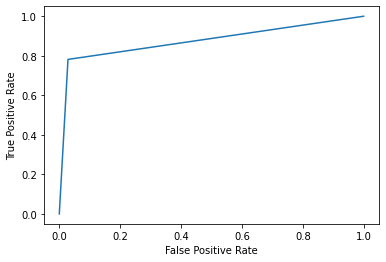

In [ ]:
#define metrics
fpr2, tpr2, _ = metrics.roc_curve(y2,  scores2)

#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Η ROC καμπύλη φανερώνει ότι οι μετρήσεις μας κοντά στην περιοχή της υπεργλυκαιμίας έχουν την τάση να είναι σωστές, όσων αφορά την ταξινόμηση στην σωστή περιοχή, υπεργλυκαιμίας ή ευγλυκαιμίας. Όμως, για ένα cgm σύστημα, τα αποτελέσματα αυτά δεν είναι επαρκώς ακριβή αφού σε επικίνδυνα πολλές περιπτώσεις μπερδεύει  τις περιοχές υπεργλυκαιμίας και ευγλυκαιμίας.

In [ ]:
TP = 0 # true positive (y[i] == scores[i] == 1)
TN = 0 # true negative (y[i] == scores[i] == 0)
FP = 0 # false positive (y[i] == 0, scores[i] == 1)
FN = 0 # false negative (y[i] == 1, scores[i] == 0)

for i in range(5041):
  if y2[i] == 1 and scores2[i] == 1:
    TP = TP + 1
  if y2[i] == 0 and scores2[i] == 0:
    TN = TN + 1
  if y2[i] == 0 and scores2[i] == 1:
    FP = FP + 1
  if y2[i] == 1 and scores2[i] == 0:
    FN = FN + 1

print('TP = ', TP)
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('sum = ', TP + TN + FP +FN)

TP =  136
TN =  4728
FP =  139
FN =  38
sum =  5041


#### Ευαισθησία/Sensitivity (Recall)

In [ ]:
Sensitivity = (TP)/(TP + FN)
print('Sensitivity = ', Sensitivity)

Sensitivity =  0.7816091954022989


#### Ειδικότητα/Specificity

In [ ]:
Specificity = (TN)/(TN + FP)
print('Specificity = ', Specificity)

Specificity =  0.9714403123073762


#### Θετική Προγνωστική Αξία/Positive Predictive Value

In [ ]:
PPV = TP/(TP + FP)
print('PPV = ', PPV)

PPV =  0.49454545454545457


#### Αρνητική Προγνωστική Αξία/Negative Predictive Value

In [ ]:
NPV = TN/(TN + FN)
print('NPV = ', NPV)

NPV =  0.9920268569030634


#### Ακρίβεια

In [ ]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy = ',  Accuracy)

Accuracy =  0.9648879190636779


## Ανασκόπηση/Συμπεράσματα
_______________________________________________________________________

Συγκεντρωτικά τα αποτελέσματα της ερώτησης 1:

Glucose Range | MARD | CC
--- | --- | ---
**Όλες οι τιμές/Αξιολόγηση συστήματος** | `6.9078` | `0.9711`
**Υπογλυκαιμία** | `12.2738` | `0.4426`
**Ευγλυκαιμία** | `6.5603` | `0.9492`
**Υπεργλυκαιμία** | `5.5495` |  `0.0599`


#### Σχολιασμός μετρικών MARD και CC:

Μέσω της ανάλυσης αυτής, αναδείχθηκε το γεγονός ότι ένα cgm σύστημα ενδέχεται συνολικά να βγάζει αποτελέσματα που να φαίνονται ακριβή, αλλά σαν σύστημα να μην είναι κατάλληλο. Συγκεκριμένα, τα αποτελέσματα είναι ακριβή, λόγω της περιοχής ευγλυκαιμίας, όπου πράγματι οι μετρήσεις είναι πολύ κοντά στις πραγματικές. Στις κρίσιμες περιοχές, όμως, στα κατώφλια της υπογλυκαιμίας και της ευγλυκαιμίας, έχουμε μη ικανοποιητικά αποτελέσματα για διαφορετικούς λόγους. Όσον αφορά την υπογλυκαιμία, το MARD ήταν κακό, αλλά η γραμμική συσχέτιση των μετρήσεων με τις πραγματικές τιμές ήταν μερικώς γραμμική. Από την άλλη, στην υπεργλυκαιμία ενω το MARD ήταν πολύ καλό, δεν υπήρχε γραμμική συσχέτιση των μετρήσεων με τις πραγματικές τιμές.

Συγκεντρωτικά τα αποτελέσματα της ερώτησης 2: Περιοχή Υπογλυκαιμίας(<70 mg/dl)

metric | value
--- | --- 
**Ευαισθησία** | `0.7993` 
**Ειδικότητα** | `0.9883`
**Θετική Προγνωστική Αξία** | `0.9318`
**Αρνητική Προγνωστική Αξία** | `0.9611`
**Ακρίβεια** | `0.9570`


Ας εξετάσουμε αρχικά τι εκφράζει κάθε δείκτης:
* Η ευαισθησία την πιθανότητα η μέτρηση να βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, όταν η πραγματική τιμή να βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, αντίστοιχα.
* Η ειδικότητα την πιθανότητα η μέτρηση να μην βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, όταν η πραγματική τιμή δεν βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, αντίστοιχα.
* Η θετική προγνωστική αξία την πιθανότητα η πραγματική τιμή να βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, όταν η μέτρηση βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, αντίστοιχα.
* Η αρνητική προγνωστική αξία την πιθανότητα η πραγματική τιμή να μην βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, όταν η μέτρηση δεν βρίσκεται στην περιοχή υπεργλυκαιμίας/υπογλυκαιμίας, αντίστοιχα.
* Η ακρίβεια το ποσοστό των σωστών μετρήσεων στην εξεταζόμενη περιοχή.

Εδώ όλες οι μετρικές είναι σε μεγάλο βαθμό ικανοποιητικές, εκτός από την ευαισθησία. Αυτό σημαίνει ότι το σύστημά μας τυχαίνει να έχει αρκετά false negative αποτελέσματα, δηλαδή να μην εντοπίζει υπογλυκαιμικά/υπεργλυκαιμικά επεισόδια, όταν αυτά συμβαίνουν. Μάλιστα, αυτό έχει σχετικά μεγάλη πιθανότητα, οπότε χρήζει άμεσης αντιμετώπισης.

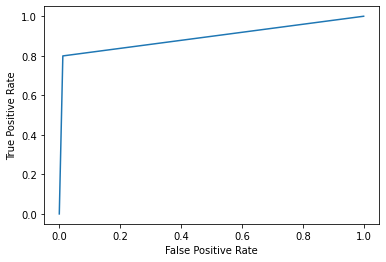

In [ ]:
# ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Συγκεντρωτικά τα αποτελέσματα της ερώτησης 3: Περιοχή Υπεργλυκαιμίας(>180 mg/dl)

metric | value
--- | --- 
**Ευαισθησία** | `0.7816` 
**Ειδικότητα** | `0.9714`
**Θετική Προγνωστική Αξία** | `0.4945`
**Αρνητική Προγνωστική Αξία** | `0.9920`
**Ακρίβεια** | `0.9649`

Και εδώ η ευαισθησία στα αποτελέσματα του αισθητήρα πρέπει να διερευνηθεί. Πρέπει, επίσης, να δοθεί ιδιαίτερη έμφαση στην θετική προγνωστική αξία. Αυτό σημαίνει ότι το σύστημά μας τυχαίνει να έχει αρκετά false positive αποτελέσματα, δηλαδή να εντοπίζει υπογλυκαιμικά/υπεργλυκαιμικά επεισόδια, χωρίς αυτά να συμβαίνουν. Είναι απαραίτητο να γίνουν οι κατάλληλες βελτιώσεις, γιατί δεν ξέρουμε τι επιπλοκές μπορεί να προκύψουν για τον ασθενή, αφού η πιθανότητα να μπερδευτεί το σύστημα είναι δραματικά μεγάλη.

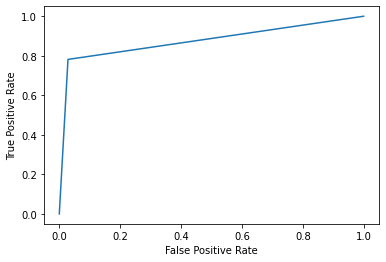

In [ ]:
#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Σχολιασμός ROC καμπύλων

Ιδανικά, θα θέλαμε η καμπύλη να φτάνει στο 1 όσο πιο γρήγορα γίνεται, για να έχουμε το ακριβέστερο δυνατό μοντέλο. Αυτό ισχύει γιατί θα είχαμε ότι οι μετρήσεις στην σωστή περιοχή θα αυξανόντουσαν δραματικά όσο αυξάνονταν και οι μετρήσεις, χωρίς να αυξάνονται οι μετρήσεις σε λανθασμένη περιοχή. Η πορεία της καμπύλης φανερώνει ότι το μοντέλο μας έχει τάση να μετράει στην σωστή περιοχή τις μετρήσεις. Αναλογιζόμενοι, όμως, την κρισιμότητα να έχουμε ακριβείς μετρήσεις στα κατώφλια της υπογλυκαιμίας και υπεργλυκαιμίας, εξάγω το συμπέρασμα ότι το σύστημα χρήζει επιδιόρθωσης/αναβάθμισης.

#### Συμπεράσματα

Μετά την διεξαγωγή της μελέτης αυτής εξάγεται το συμπέρασμα ότι η ικανότητα του αισθητήρα συνεχούς καταγραφής γλυκόζης να ανιχνεύει τις υπογλυκαιμίες και τις υπεργλυκαιμίες δεν είναι επαρκής και αρκετά ακριβής. Το σύστημα χρήζει άμεσης αναβάθμισης και/ή επιδιόρθωσης, αφού στις κρίσιμες περιοχές οι μετρήσεις δεν είναι οι αναμενόμενες με σχετικά μεγάλη πιθανότητα, όπως έδειξε η πληθώρα δεικτών που εξετάστηκαν. Από την άλλη, η ταξινόμηση των μετρήσεων στην εκάστοτε περιοχή τιμών γλυκόζης φαίνεται να είναι ικανοποιητική από πολλές μετρικές, αλλά αξίζουν να εξεταστούν οι περιπτώσεις που δεν απέφεραν και τόσο ακριβή αποτελέσματα.